Loading...
List data [150, 200, 250, 300, 350, 400]

Available algorithms: ['GA', 'PSO', 'Greedy', 'PSO_Adaptive Noise', 'PSO_Lévy flight Noise']

Saved plot_alive_nodes_by_cycle.png
Saved plot_cycles_completed.png
Saved plot_energy_consumed.png

Complete


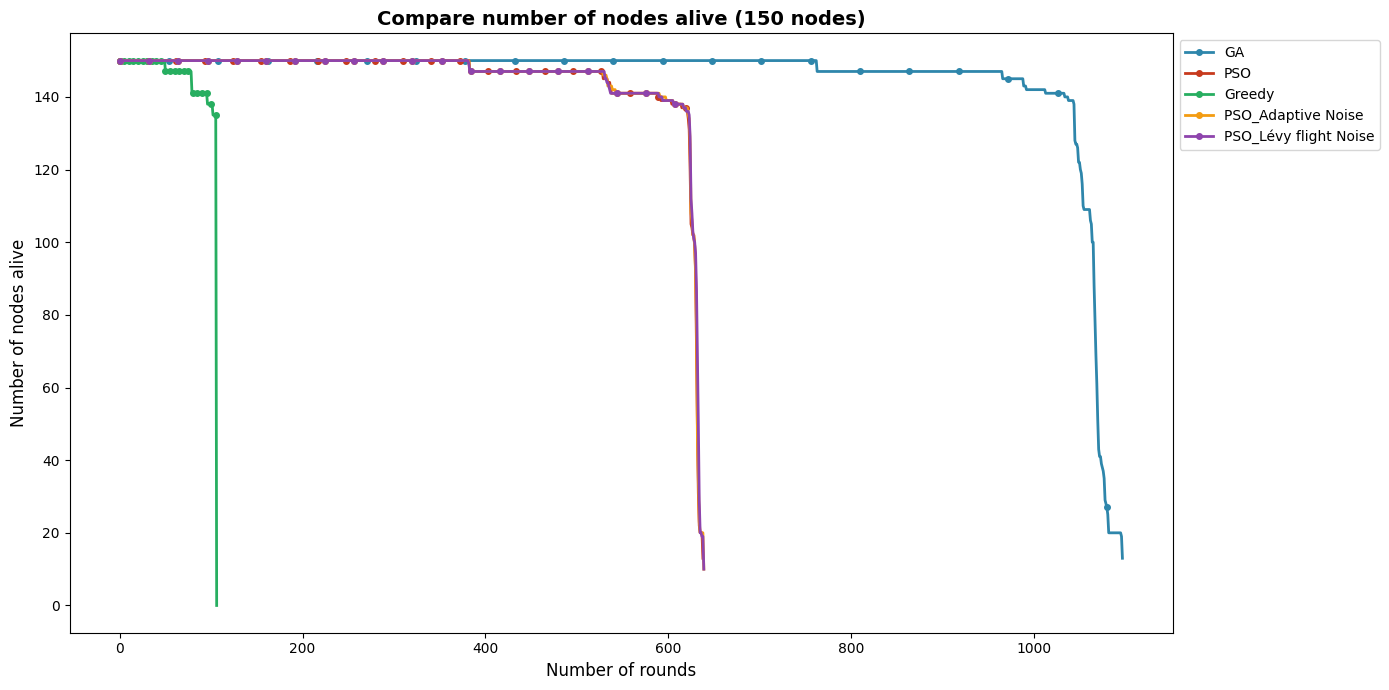

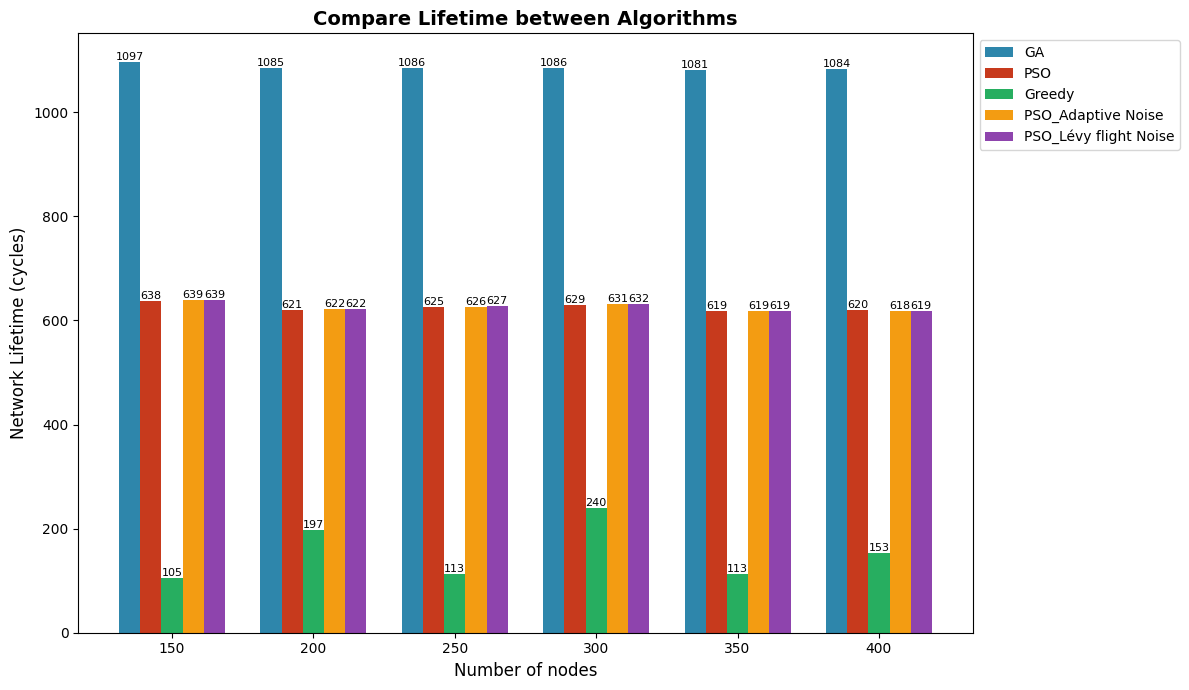

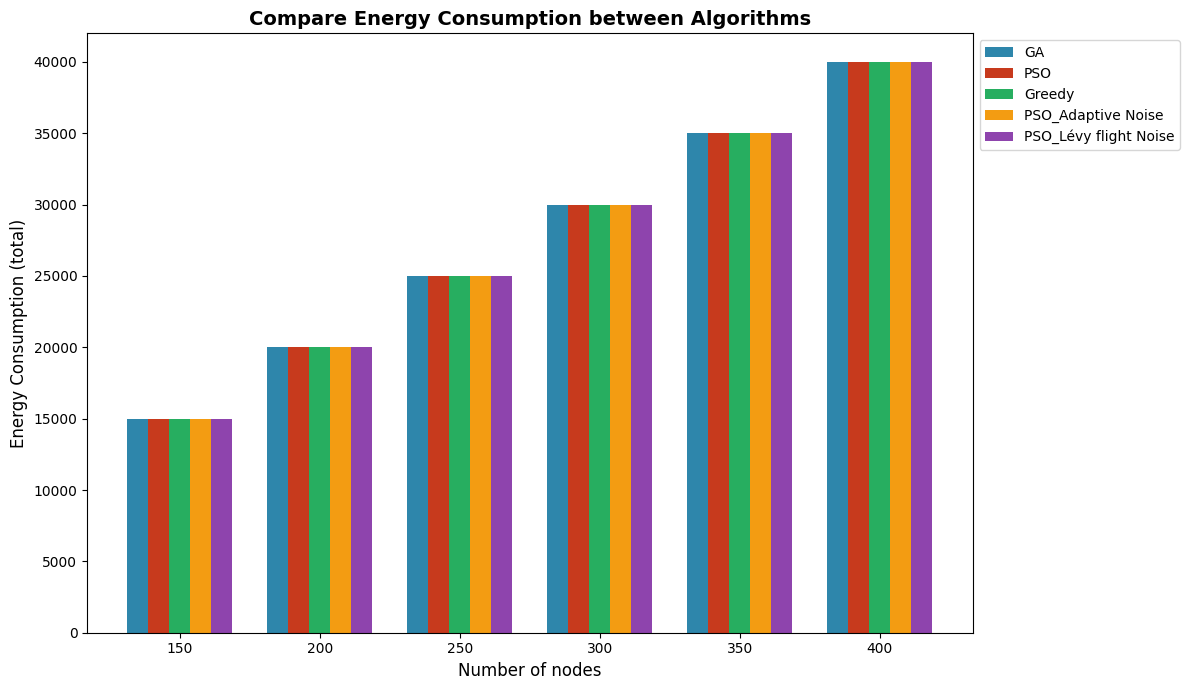

In [6]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu từ các file JSON
def load_data(base_path="D:\Year 4\\tiến hóa\draw\\results_history_noga"):
    """Đọc dữ liệu từ folder results_history"""
    data = {}
    node_counts = [150, 200, 250, 300, 350, 400]
    
    for nodes in node_counts:
        folder_name = f"folder_nodes_{nodes}"
        folder_path = os.path.join(base_path, folder_name)
        
        data[nodes] = {}
        
        # Danh sách các thuật toán và file tương ứng
        algorithms = {
            'GA': 'GA_result.json',
            'PSO': 'PSO_result.json',
            'Greedy': 'Greedy_result.json',
            'PSO_Adaptive Noise': 'PSOver2_result.json',
            'PSO_Lévy flight Noise': 'PSOver3_result.json'
        }
        
        # Đọc file cho từng thuật toán
        for algo_name, file_name in algorithms.items():
            file_path = os.path.join(folder_path, file_name)
            if os.path.exists(file_path):
                with open(file_path, 'r') as f:
                    data[nodes][algo_name] = json.load(f)
    
    return data

# Vẽ biểu đồ a) So sánh số lượng node sống theo chu kỳ
def plot_alive_nodes_by_cycle(data):
    """Biểu đồ đường so sánh số lượng node sống theo chu kỳ"""
    plt.figure(figsize=(14, 7))
    
    target_nodes = 150
    
    if target_nodes in data:
        # Định nghĩa màu sắc và marker cho từng thuật toán
        styles = {
            'GA': {'color': '#2E86AB', 'marker': 'o', 'linestyle': '-'},
            'PSO': {'color': '#C73A1D', 'marker': 'o', 'linestyle': '-'},
            'Greedy': {'color': '#27AE60', 'marker': 'o', 'linestyle': '-'},
            'PSO_Adaptive Noise': {'color': '#F39C12', 'marker': 'o', 'linestyle': '-'},
            'PSO_Lévy flight Noise': {'color': '#8E44AD', 'marker': 'o', 'linestyle': '-'}
        }
        
        for algo_name, style in styles.items():
            if algo_name in data[target_nodes] and 'alive_log' in data[target_nodes][algo_name]:
                alive_data = data[target_nodes][algo_name]['alive_log']
                cycles = range(len(alive_data))
                
                plt.plot(cycles, alive_data, 
                        label=algo_name, 
                        linewidth=2, 
                        marker=style['marker'],
                        color=style['color'],
                        linestyle=style['linestyle'],
                        markersize=4, 
                        markevery=max(1, len(alive_data)//20))
        
        plt.xlabel('Number of rounds', fontsize=12)
        plt.ylabel('Number of nodes alive', fontsize=12)
        plt.title(f'Compare number of nodes alive ({target_nodes} nodes)', 
                 fontsize=14, fontweight='bold')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        #plt.grid(True, alpha=0.3, linestyle='--')
        plt.tight_layout()
        plt.savefig('plot_alive_nodes_by_cycle.png', dpi=300, bbox_inches='tight')
        print("Saved plot_alive_nodes_by_cycle.png")
    else:
        print(f"Không tìm thấy dữ liệu cho {target_nodes} nodes")

# b) So sánh số chu kỳ hoàn thành
def plot_cycles_completed(data):
    """Biểu đồ cột so sánh số chu kỳ hoàn thành"""
    node_counts = sorted(data.keys())
    
    # Lấy danh sách thuật toán có sẵn
    algorithms = ['GA', 'PSO', 'Greedy', 'PSO_Adaptive Noise', 'PSO_Lévy flight Noise']
    colors = ['#2E86AB', '#C73A1D', '#27AE60', '#F39C12', '#8E44AD']
    
    # Lọc các thuật toán có dữ liệu
    available_algos = []
    for algo in algorithms:
        if any(algo in data[n] for n in node_counts):
            available_algos.append(algo)
    
    num_algos = len(available_algos)
    x = np.arange(len(node_counts))
    width = 0.15
    
    plt.figure(figsize=(12, 7))
    
    for i, algo in enumerate(available_algos):
        cycles = []
        for n in node_counts:
            if algo in data[n] and 'cycles_completed' in data[n][algo]:
                cycles.append(data[n][algo]['cycles_completed'])
            else:
                cycles.append(0)
        
        offset = (i - num_algos/2 + 0.5) * width
        bars = plt.bar(x + offset, cycles, width, 
                      label=algo, 
                      color=colors[algorithms.index(algo)])
        
        # Thêm giá trị trên các cột
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                plt.text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height)}',
                        ha='center', va='bottom', fontsize=8)
    
    plt.xlabel('Number of nodes', fontsize=12)
    plt.ylabel('Network Lifetime (cycles)', fontsize=12)
    plt.title('Compare Lifetime between Algorithms', 
             fontsize=14, fontweight='bold')
    plt.xticks(x, node_counts)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    #plt.grid(True, axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('plot_cycles_completed.png', dpi=300, bbox_inches='tight')
    print("Saved plot_cycles_completed.png")

# c) So sánh tổng năng lượng tiêu thụ
def plot_energy_consumed(data):
    """Biểu đồ cột so sánh tổng năng lượng tiêu thụ"""
    node_counts = sorted(data.keys())
    
    algorithms = ['GA', 'PSO', 'Greedy', 'PSO_Adaptive Noise', 'PSO_Lévy flight Noise']
    colors = ['#2E86AB', '#C73A1D', '#27AE60', '#F39C12', '#8E44AD']
    
    # Lọc các thuật toán có dữ liệu
    available_algos = []
    for algo in algorithms:
        if any(algo in data[n] for n in node_counts):
            available_algos.append(algo)
    
    num_algos = len(available_algos)
    x = np.arange(len(node_counts))
    width = 0.15
    
    plt.figure(figsize=(12, 7))
    
    for i, algo in enumerate(available_algos):
        energy = []
        for n in node_counts:
            if algo in data[n] and 'total_energy_consumed' in data[n][algo]:
                energy.append(data[n][algo]['total_energy_consumed'])
            else:
                energy.append(0)
        
        offset = (i - num_algos/2 + 0.5) * width
        bars = plt.bar(x + offset, energy, width, 
                      label=algo, 
                      color=colors[algorithms.index(algo)])
        
       
    plt.xlabel('Number of nodes', fontsize=12)
    plt.ylabel('Energy Consumption (total)', fontsize=12)
    plt.title('Compare Energy Consumption between Algorithms', 
             fontsize=14, fontweight='bold')
    plt.xticks(x, node_counts)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    #plt.grid(True, axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('plot_energy_consumed.png', dpi=300, bbox_inches='tight')
    print("Saved plot_energy_consumed.png")

def main():
    print("Loading...")
    data = load_data("D:\Year 4\\tiến hóa\project\kaggle\output\\results_routing")
    print(f"List data {sorted(data.keys())}\n")
    
    # Kiểm tra các thuật toán có sẵn
    if data:
        sample_node = list(data.keys())[0]
        print(f"Available algorithms: {list(data[sample_node].keys())}\n")
    
    # Vẽ 3 biểu đồ
    plot_alive_nodes_by_cycle(data)
    plot_cycles_completed(data)
    plot_energy_consumed(data)
    
    print("\nComplete")

if __name__ == "__main__":
    main()